In [1]:
import matplotlib.pyplot as plt

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Category: [8]


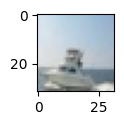

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import logging

tf.get_logger().setLevel(logging.ERROR)

cifar_dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

print(f"Category: {train_labels[100]}")
plt.figure(figsize=(1, 1))
plt.imshow(train_images[100])
plt.show()

In [ ]:
def graph(history):
    mse_train = history.history["loss"]
    mse_val = history.history["val_loss"]

    plt.figure(figsize=(10, 6))
    plt.plot(mse_train, label="Train MSE")
    plt.plot(mse_val, label="Test MSE (Validation)", linestyle="--")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Train vs Test MSE over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
train_labels.shape

(50000, 1)

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images[100].shape

(32, 32, 3)

In [8]:
train_images[100][0].shape

(32, 3)

In [ ]:
train_images[100][0][0]  # Color

array([213, 229, 242], dtype=uint8)

In [4]:
# Pagina 191
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
import numpy as np
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

cifar_dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
mean = np.mean(train_images)
stddev = np.std(train_images)

train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

print(f"mean: {mean}")
print(f"stddev {stddev}")

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

mean: 120.70756512369792
stddev 64.1500758911213


In [ ]:
model = Sequential()
model.add(
    Conv2D(
        64,
        (5, 5),
        strides=(2, 2),
        activation="relu",
        padding="same",
        input_shape=(32, 32, 3),
        kernel_initializer="he_normal",
        bias_initializer="zeros",
    )
)
model.add(
    Conv2D(
        64,
        (3, 3),
        strides=(2, 2),
        activation="relu",
        padding="same",
        input_shape=(32, 32, 3),
        kernel_initializer="he_normal",
        bias_initializer="zeros",
    )
)
model.add(Flatten())
model.add(
    Dense(
        10,
        activation="softmax",
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
    )
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

/home/erich/dev/nvidia_book/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-14 00:20:55.813916: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,762 (323.29 KB)

 Trainable params: 82,762 (323.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/128
1563/1563 - 11s - 7ms/step - accuracy: 0.5037 - loss: 1.4112 - val_accuracy: 0.5999 - val_loss: 1.1493
Epoch 2/128
1563/1563 - 11s - 7ms/step - accuracy: 0.6381 - loss: 1.0397 - val_accuracy: 0.6314 - val_loss: 1.0753
Epoch 3/128
1563/1563 - 11s - 7ms/step - accuracy: 0.6880 - loss: 0.9002 - val_accuracy: 0.6522 - val_loss: 1.0253
Epoch 4/128
1563/1563 - 20s - 13ms/step - accuracy: 0.7240 - loss: 0.8004 - val_accuracy: 0.6612 - val_loss: 1.0072
Epoch 5/128
1563/1563 - 22s - 14ms/step - accuracy: 0.7465 - loss: 0.7206 - val_accuracy: 0.6438 - val_loss: 1.0694
Epoch 6/128
1563/1563 - 17s - 11ms/step - accuracy: 0.7718 - loss: 0.6513 - val_accuracy: 0.6530 - val_loss: 1.1262
Epoch 7/128
1563/1563 - 18s - 11ms/step - accuracy: 0.7902 - loss: 0.5944 - val_accuracy: 0.6502 - val_loss: 1.1304
Epoch 8/128
1563/1563 - 20s - 13ms/step - accuracy: 0.8102 - loss: 0.5410 - val_accuracy: 0.6490 - val_loss: 1.1713
Epoch 9/128
1563/1563 - 20s - 12ms/step - accuracy: 0.8257 - loss: 0.4938 -

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,288 (969.88 KB)

 Trainable params: 82,762 (323.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,526 (646.59 KB)

In [ ]:
graph(history)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(64, (4, 4), activation="relu", padding="same", input_shape=(32, 32, 3))
)
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation="relu", padding="same", strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", strides=(2, 2)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()